In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Tâche 1 :
###### Exploitez la base de données "possum.csv". Préparez cette base de données de manière à ce qu’elle soit correctement nettoyée.
###### Puis affichez les données des descripteurs ciblés

In [2]:
# Charger la base de données
df = pd.read_csv('possum.csv')

In [7]:
# Afficher les premières lignes du DataFrame pour vérifier son contenu
print(df.head())

# Vérification des informations sur les colonnes
print(df.info())

  sex  age  hdlngth  skullw  totlngth  taill  footlgth  earconch   eye  chest  \
0   m  1.0     85.9    52.4      80.5   35.0      62.0      42.4  14.1   25.5   
1   m  1.0     86.7    52.6      84.0   38.0      62.3      44.8  15.0   23.5   
2   m  1.0     85.8    50.0      81.0   36.5      62.8      43.0  14.8   22.0   
3   m  1.0     86.5    51.0      81.0   36.5      63.0      44.3  13.2   23.0   
4   m  1.0     88.6    54.7      82.5   39.0      64.4      48.0  14.0   25.0   

   belly  
0   30.0  
1   30.5  
2   28.5  
3   28.0  
4   33.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       82 non-null     object 
 1   age       80 non-null     float64
 2   hdlngth   82 non-null     float64
 3   skullw    82 non-null     float64
 4   totlngth  82 non-null     float64
 5   taill     82 non-null     float64
 6   footlgth  81 non-null     f

In [24]:
# Affichage des descripteurs ciblés : footlength et earconch
df_descriptors = df[['footlgth', 'earconch']]
print(df_descriptors.head())

   footlgth  earconch
0      62.0      42.4
1      62.3      44.8
2      62.8      43.0
3      63.0      44.3
4      64.4      48.0


In [25]:
# Vérification des valeurs manquantes
print(df_descriptors.isnull().sum())

footlgth    1
earconch    0
dtype: int64


In [26]:
# Suppression des lignes avec des valeurs manquantes
df_clean = df_descriptors.dropna()

# Vérification
print(df_clean.isnull().sum())

footlgth    0
earconch    0
dtype: int64


In [36]:
print(df_clean.head())
print(df_clean.dtypes)

   footlgth  earconch
0      62.0      42.4
1      62.3      44.8
2      62.8      43.0
3      63.0      44.3
4      64.4      48.0
footlgth    float64
earconch    float64
dtype: object


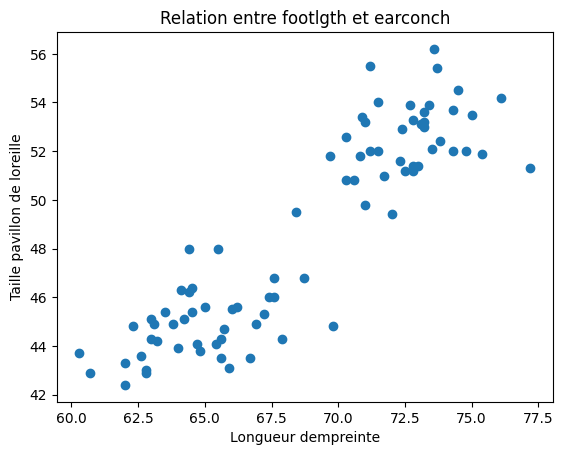

In [46]:
# Visualisation de la relation entre footlength et earconch avec un scatter plot
footlgth = df_clean['footlgth']
earconch = df_clean['earconch']
plt.scatter(footlgth, earconch)
plt.title('Relation entre footlgth et earconch')
plt.xlabel('Longueur d''empreinte')
plt.ylabel('Taille pavillon de l''oreille')
plt.show()

In [63]:
def predict_model(alpha, beta, X):
    return alpha * X + beta

In [71]:
def mean_square_error(y_reel, y_pred):
    mse = ((y_reel - y_pred) ** 2).mean()
    return mse

In [65]:
# Exemples de paramètres
alphas_betas = [(0.25, 0.5), (0.75, 1), (1, 2)]

# Calcul des MSE pour chaque modèle
for alpha, beta in alphas_betas:
    predictions = predict_model(alpha, beta, footlgth)
    error = mean_square_error(earconch, predictions)
    print(f"Model (alpha={alpha}, beta={beta}): MSE = {error:.3f}")


Model (alpha=0.25, beta=0.5): MSE = 968.020
Model (alpha=0.75, beta=1): MSE = 18.450
Model (alpha=1, beta=2): MSE = 489.516


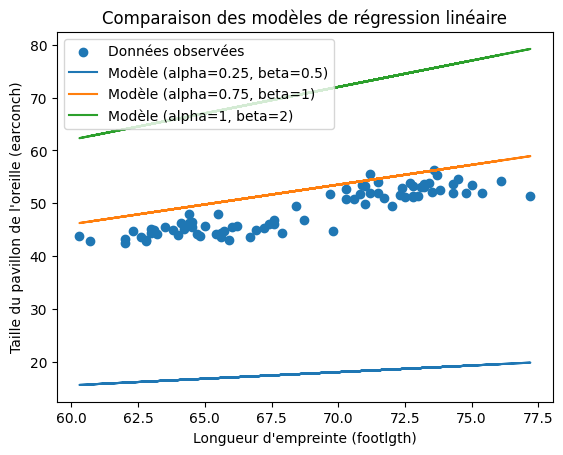

MSE pour chaque modèle :
Model (alpha=0.25, beta=0.5): MSE = 968.020
Model (alpha=0.75, beta=1): MSE = 18.450
Model (alpha=1, beta=2): MSE = 489.516


In [72]:
# Exemples de paramètres
alphas_betas = [(0.25, 0.5), (0.75, 1), (1, 2)]

# Créer le plot
plt.figure()
plt.scatter(footlgth, earconch, label='Données observées')  # Points observés

# Initialisation d'une liste pour stocker les MSE
mse_values = []

# Tracer chaque modèle et calculer les MSE
for alpha, beta in alphas_betas:
    predictions = predict_model(alpha, beta, footlgth)
    error = mean_square_error(earconch, predictions)
    mse_values.append((alpha, beta, error))  # Stocker les résultats
    plt.plot(footlgth, predictions, label=f'Modèle (alpha={alpha}, beta={beta})')

# Ajouter des annotations
plt.xlabel('Longueur d\'empreinte (footlgth)')
plt.ylabel('Taille du pavillon de l\'oreille (earconch)')
plt.title('Comparaison des modèles de régression linéaire')
plt.legend()
plt.show()

# Afficher les MSE pour chaque modèle
print("MSE pour chaque modèle :")
for alpha, beta, error in mse_values:
    print(f"Model (alpha={alpha}, beta={beta}): MSE = {error:.3f}")


Coefficients optimaux : alpha = 0.839, beta = -8.992
Erreur quadratique moyenne (MSE) avec les paramètres optimaux : 3.276


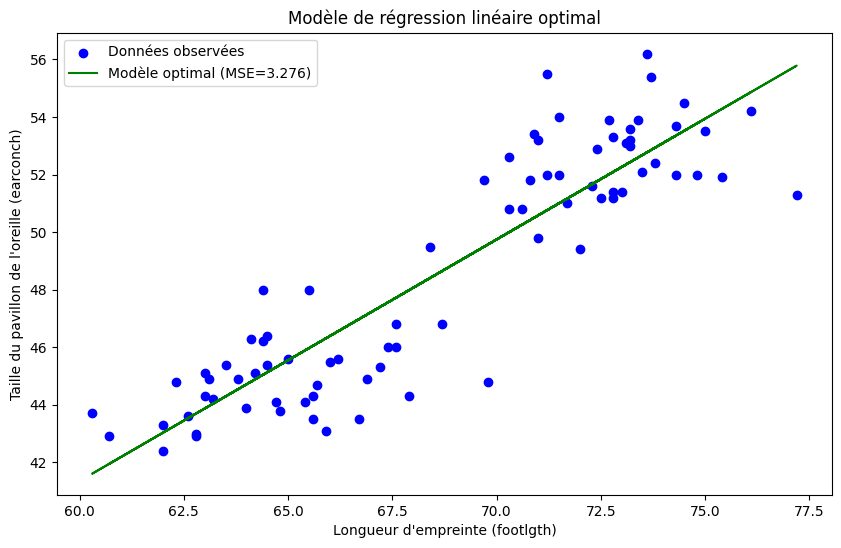

In [77]:
# Solution 2
# Calcul des paramètres optimaux alpha et beta
def optimal_coefficients(x, y):
    x_bar = x.mean()
    y_bar = y.mean()

    # Calcul de alpha
    numerateur = ((x - x_bar) * (y - y_bar)).sum()
    denominateur = ((x - x_bar) ** 2).sum()
    alpha = numerateur / denominateur

    # Calcul de beta
    beta = y_bar - alpha * x_bar

    return alpha, beta

# Calcul des coefficients optimaux
alpha_opt, beta_opt = optimal_coefficients(footlgth, earconch)
print(f"Coefficients optimaux : alpha = {alpha_opt:.3f}, beta = {beta_opt:.3f}")

# Prédiction avec les paramètres optimaux
optimal_predictions = predict_model(alpha_opt, beta_opt, footlgth)

# Calcul de la MSE pour les paramètres optimaux
optimal_mse = mean_square_error(earconch, optimal_predictions)
print(f"Erreur quadratique moyenne (MSE) avec les paramètres optimaux : {optimal_mse:.3f}")

# Visualisation du modèle optimal
plt.figure(figsize=(10, 6))
plt.scatter(footlgth, earconch, color='blue', label='Données observées')  # Points observés
plt.plot(footlgth, optimal_predictions, color='green', label=f'Modèle optimal (MSE={optimal_mse:.3f})')
plt.xlabel('Longueur d\'empreinte (footlgth)')
plt.ylabel('Taille du pavillon de l\'oreille (earconch)')
plt.title('Modèle de régression linéaire optimal')
plt.legend()
plt.show()

Coefficients optimaux : alpha = 0.839, beta = -8.992
Erreur quadratique moyenne (MSE) avec les paramètres optimaux : 3.276


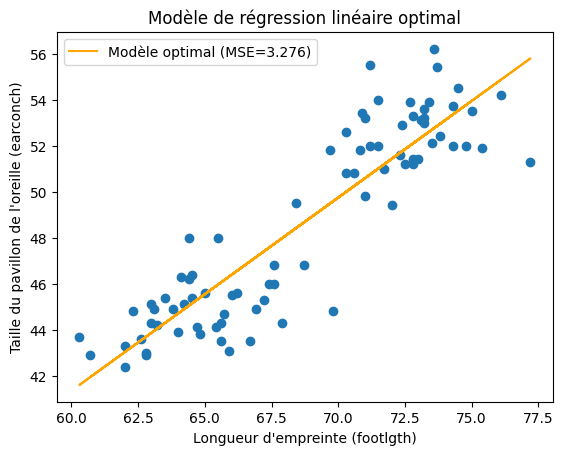

In [82]:
# Calcul des coefficients alpha et beta

x = footlgth
y = earconch
x_bar = x.mean()
y_bar = y.mean()

# Calcul de alpha
numerator = ((x - x_bar) * (y - y_bar)).sum()
denominator = ((x - x_bar) ** 2).sum()
alpha_optimal = numerator / denominator

# Calcul de beta
beta_optimal = y_bar - alpha_optimal * x_bar

# Affichage des coefficients
print(f"Coefficients optimaux : alpha = {alpha_optimal:.3f}, beta = {beta_optimal:.3f}")

# Prédiction avec les paramètres optimaux
optimal_y_predictions = predict_model(alpha_optimal, beta_optimal, x)

# Calcul de la MSE pour les paramètres optimaux
optimal_mse = mean_square_error(y, optimal_y_predictions)
print(f"Erreur quadratique moyenne (MSE) avec les paramètres optimaux : {optimal_mse:.3f}")

# Visualisation du modèle optimal
plt.figure()
plt.scatter(x, y)  # Points observés
plt.plot(x, optimal_y_predictions, color='orange', label=f'Modèle optimal (MSE={optimal_mse:.3f})')
plt.xlabel('Longueur d\'empreinte (footlgth)')
plt.ylabel('Taille du pavillon de l\'oreille (earconch)')
plt.title('Modèle de régression linéaire optimal')
plt.legend()
plt.show()